<a href="https://colab.research.google.com/github/KukavicaHome/Skeleton-Robot/blob/main/Skeleton_robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

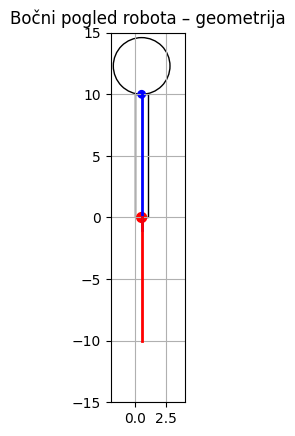

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Dimenzije
trup_width = 1
trup_height = 10
glava_radius = 2.3
ruka_duzina = 11
ruka_zglob_radius = 0.3
noga_duzina = 10
noga_zglob_radius = 0.4

# Koordinate trupa (gledano s boka, samo desna strana)
trup_bottom = (0, 0)
trup_top = (0, trup_height)

# Centar glave (na sredini gornjeg dijela trupa)
glava_center = (trup_width / 2, trup_height + glava_radius)

# Rame (kružni zglob na vrhu trupa)
rame_center = (trup_width / 2, trup_height)

# Kuk (kružni zglob na dnu trupa)
kuk_center = (trup_width / 2, 0)

# Lakat – produžetak prema dolje
lakat_end = (rame_center[0], rame_center[1] - ruka_duzina)

# Koljeno – isto dolje od kuka
koljeno_end = (kuk_center[0], kuk_center[1] - noga_duzina)

# Početak crtanja
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2, 4)
ax.set_ylim(-15, 15)

# Trup (pravougaonik)
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava (kružnica)
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Rame (zglob)
rame = patches.Circle(rame_center, ruka_zglob_radius, color='blue')
ax.add_patch(rame)

# Kuk (zglob)
kuk = patches.Circle(kuk_center, noga_zglob_radius, color='red')
ax.add_patch(kuk)

# Ruka (linija)
ax.plot([rame_center[0], lakat_end[0]], [rame_center[1], lakat_end[1]], 'b-', linewidth=2)

# Noga (linija)
ax.plot([kuk_center[0], koljeno_end[0]], [kuk_center[1], koljeno_end[1]], 'r-', linewidth=2)

# Prikaz
plt.title("Bočni pogled robota – geometrija")
plt.grid(True)
plt.show()

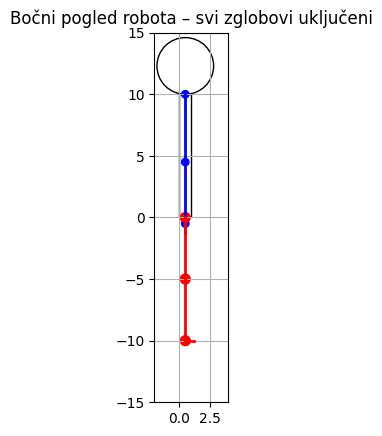

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dimenzije
trup_width = 1
trup_height = 10
glava_radius = 2.3

# Ruka
nadlaktica_duzina = 5.5
podlaktica_duzina = 5
saka_duzina = 1
zglob_radius = 0.3

# Noga
natkoljenica_duzina = 5
potkoljenica_duzina = 5
stopalo_duzina = 1
kuk_zglob_radius = 0.4

# Trup pozicija
trup_bottom = (0, 0)
trup_top = (0, trup_height)

# Glava (sredina iznad trupa)
glava_center = (trup_width / 2, trup_height + glava_radius)

# Ruka: rame -> lakat -> zglob -> šaka
rame = (trup_width / 2, trup_height)
lakat = (rame[0], rame[1] - nadlaktica_duzina)
zglob_sake = (lakat[0], lakat[1] - podlaktica_duzina)
saka_end = (zglob_sake[0], zglob_sake[1] - saka_duzina)

# Noga: kuk -> koljeno -> gležanj -> stopalo
kuk = (trup_width / 2, 0)
koljeno = (kuk[0], kuk[1] - natkoljenica_duzina)
glezanj = (koljeno[0], koljeno[1] - potkoljenica_duzina)
stopalo_end = (glezanj[0] + stopalo_duzina, glezanj[1])  # stopalo ide desno

# Crtanje
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2, 4)
ax.set_ylim(-15, 15)

# Trup
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruka
ax.plot([rame[0], lakat[0]], [rame[1], lakat[1]], 'b-', linewidth=2)
ax.plot([lakat[0], zglob_sake[0]], [lakat[1], zglob_sake[1]], 'b-', linewidth=2)
ax.plot([zglob_sake[0], saka_end[0]], [zglob_sake[1], saka_end[1]], 'b--', linewidth=2)

# Noga
ax.plot([kuk[0], koljeno[0]], [kuk[1], koljeno[1]], 'r-', linewidth=2)
ax.plot([koljeno[0], glezanj[0]], [koljeno[1], glezanj[1]], 'r-', linewidth=2)
ax.plot([glezanj[0], stopalo_end[0]], [glezanj[1], stopalo_end[1]], 'r--', linewidth=2)

# Zglobovi: rame, lakat, zglob ruke, kuk, koljeno, gležanj
for center in [rame, lakat, zglob_sake]:
    ax.add_patch(patches.Circle(center, zglob_radius, color='blue'))

for center in [kuk, koljeno, glezanj]:
    ax.add_patch(patches.Circle(center, kuk_zglob_radius, color='red'))

# Prikaz
plt.title("Bočni pogled robota – svi zglobovi uključeni")
plt.grid(True)
plt.show()

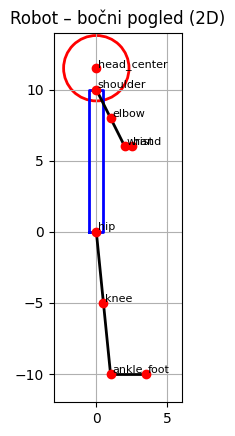

In [ ]:

import matplotlib.pyplot as plt

# 1. Koordinate zglobova (bočni pogled)
joints = {
    "head_center": (0, 11.5),  # centar glave iznad trupa
    "shoulder": (0, 10),       # gornji centar trupa
    "elbow": (1, 8),           # lakat
    "wrist": (2, 6),           # zglob ruke
    "hand": (2.5, 6),          # šaka

    "hip": (0, 0),             # donji centar trupa
    "knee": (0.5, -5),         # koljeno
    "ankle": (1, -10),         # gležanj
    "foot": (3.5, -10),        # stopalo (2.5 dužina od gležnja)
}

# 2. Definiši kosti (veze među zglobovima)
bones = [
    ("shoulder", "elbow"),
    ("elbow", "wrist"),
    ("wrist", "hand"),

    ("hip", "knee"),
    ("knee", "ankle"),
    ("ankle", "foot")
]

def draw_robot(joints, bones):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Nacrtaj trup (pravougaonik)
    trunk_width = 1
    trunk_height = 10
    left = -trunk_width / 2
    right = trunk_width / 2
    bottom = 0
    top = trunk_height
    ax.plot([left, right, right, left, left],
            [bottom, bottom, top, top, bottom],
            'b-', linewidth=2)

    # Nacrtaj glavu (kružnica)
    head_radius = 2.3
    head = plt.Circle(joints["head_center"], head_radius, fill=False, color='r', linewidth=2)
    ax.add_patch(head)

    # Nacrtaj kosti
    for joint1, joint2 in bones:
        x1, y1 = joints[joint1]
        x2, y2 = joints[joint2]
        ax.plot([x1, x2], [y1, y2], 'k-', linewidth=2)

    # Nacrtaj zglobove
    for name, (x, y) in joints.items():
        ax.plot(x, y, 'ro')
        ax.text(x + 0.1, y + 0.1, name, fontsize=8)

    ax.set_xlim(-3, 6)
    ax.set_ylim(-12, 14)
    plt.title("Robot – bočni pogled (2D)")
    plt.grid(True)
    plt.show()

# 3. Pozovi funkciju za crtanje
draw_robot(joints, bones)

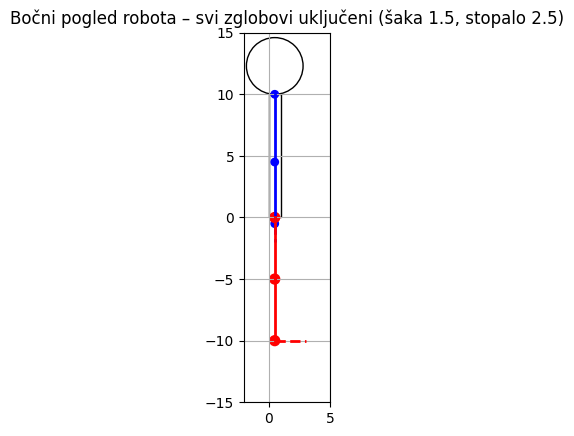

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dimenzije
trup_width = 1
trup_height = 10
glava_radius = 2.3

# Ruka
nadlaktica_duzina = 5.5
podlaktica_duzina = 5
saka_duzina = 1.5          # promijenjeno sa 1 → 1.5
zglob_radius = 0.3

# Noga
natkoljenica_duzina = 5
potkoljenica_duzina = 5
stopalo_duzina = 2.5       # promijenjeno sa 1 → 2.5
kuk_zglob_radius = 0.4

# Trup pozicija
trup_bottom = (0, 0)
trup_top = (0, trup_height)

# Glava (sredina iznad trupa)
glava_center = (trup_width / 2, trup_height + glava_radius)

# Ruka: rame -> lakat -> zglob -> šaka
rame = (trup_width / 2, trup_height)
lakat = (rame[0], rame[1] - nadlaktica_duzina)
zglob_sake = (lakat[0], lakat[1] - podlaktica_duzina)
saka_end = (zglob_sake[0], zglob_sake[1] - saka_duzina)

# Noga: kuk -> koljeno -> gležanj -> stopalo
kuk = (trup_width / 2, 0)
koljeno = (kuk[0], kuk[1] - natkoljenica_duzina)
glezanj = (koljeno[0], koljeno[1] - potkoljenica_duzina)
stopalo_end = (glezanj[0] + stopalo_duzina, glezanj[1])  # stopalo ide desno

# Crtanje
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2, 5)
ax.set_ylim(-15, 15)

# Trup
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruka
ax.plot([rame[0], lakat[0]], [rame[1], lakat[1]], 'b-', linewidth=2)
ax.plot([lakat[0], zglob_sake[0]], [lakat[1], zglob_sake[1]], 'b-', linewidth=2)
ax.plot([zglob_sake[0], saka_end[0]], [zglob_sake[1], saka_end[1]], 'b--', linewidth=2)

# Noga
ax.plot([kuk[0], koljeno[0]], [kuk[1], koljeno[1]], 'r-', linewidth=2)
ax.plot([koljeno[0], glezanj[0]], [koljeno[1], glezanj[1]], 'r-', linewidth=2)
ax.plot([glezanj[0], stopalo_end[0]], [glezanj[1], stopalo_end[1]], 'r--', linewidth=2)

# Zglobovi: rame, lakat, zglob ruke, kuk, koljeno, gležanj
for center in [rame, lakat, zglob_sake]:
    ax.add_patch(patches.Circle(center, zglob_radius, color='blue'))

for center in [kuk, koljeno, glezanj]:
    ax.add_patch(patches.Circle(center, kuk_zglob_radius, color='red'))

# Prikaz
plt.title("Bočni pogled robota – svi zglobovi uključeni (šaka 1.5, stopalo 2.5)")
plt.grid(True)
plt.show()

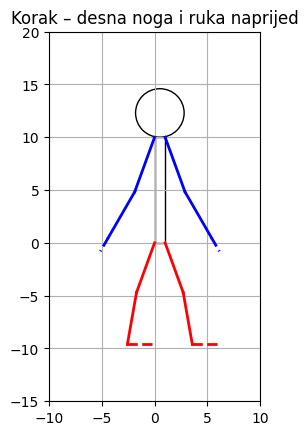

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Funkcija za rotaciju segmenta
def next_point(origin, length, angle_deg):
    angle_rad = np.radians(angle_deg)
    x = origin[0] + length * np.sin(angle_rad)
    y = origin[1] - length * np.cos(angle_rad)
    return (x, y)

# Parametri
trup_width = 1
trup_height = 10
glava_radius = 2.3

nadlaktica = 5.5
podlaktica = 5
saka = 1.5
natkoljenica = 5
potkoljenica = 5
stopalo = 2.5

# Uglovi u stepenima
uglovi = {
    'desna_ruka_rame': 20,
    'desna_ruka_lakat': 10,
    'lijeva_ruka_rame': -20,
    'lijeva_ruka_lakat': -10,
    'desna_noga_kuk': 20,
    'desna_noga_koljeno': -10,
    'lijeva_noga_kuk': -20,
    'lijeva_noga_koljeno': 10,
}

# Početne tačke
trup_bottom = (0, 0)
trup_top = (0, trup_height)
glava_center = (trup_width / 2, trup_height + glava_radius)

# Rame i kuk – referentne tačke
rame_d = (trup_width, trup_height)
rame_l = (0, trup_height)
kuk_d = (trup_width, 0)
kuk_l = (0, 0)

# Desna ruka
lakat_d = next_point(rame_d, nadlaktica, uglovi['desna_ruka_rame'])
zglob_d = next_point(lakat_d, podlaktica, uglovi['desna_ruka_rame'] + uglovi['desna_ruka_lakat'])
saka_d = next_point(zglob_d, saka, uglovi['desna_ruka_rame'] + uglovi['desna_ruka_lakat'])

# Lijeva ruka
lakat_l = next_point(rame_l, nadlaktica, uglovi['lijeva_ruka_rame'])
zglob_l = next_point(lakat_l, podlaktica, uglovi['lijeva_ruka_rame'] + uglovi['lijeva_ruka_lakat'])
saka_l = next_point(zglob_l, saka, uglovi['lijeva_ruka_rame'] + uglovi['lijeva_ruka_lakat'])

# Desna noga
koljeno_d = next_point(kuk_d, natkoljenica, uglovi['desna_noga_kuk'])
glezanj_d = next_point(koljeno_d, potkoljenica, uglovi['desna_noga_kuk'] + uglovi['desna_noga_koljeno'])
stopalo_d = (glezanj_d[0] + stopalo, glezanj_d[1])

# Lijeva noga
koljeno_l = next_point(kuk_l, natkoljenica, uglovi['lijeva_noga_kuk'])
glezanj_l = next_point(koljeno_l, potkoljenica, uglovi['lijeva_noga_kuk'] + uglovi['lijeva_noga_koljeno'])
stopalo_l = (glezanj_l[0] + stopalo, glezanj_l[1])

# Crtanje
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-15, 20)

# Trup
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruke
ax.plot([rame_d[0], lakat_d[0]], [rame_d[1], lakat_d[1]], 'b-', linewidth=2)
ax.plot([lakat_d[0], zglob_d[0]], [lakat_d[1], zglob_d[1]], 'b-', linewidth=2)
ax.plot([zglob_d[0], saka_d[0]], [zglob_d[1], saka_d[1]], 'b--', linewidth=2)

ax.plot([rame_l[0], lakat_l[0]], [rame_l[1], lakat_l[1]], 'b-', linewidth=2)
ax.plot([lakat_l[0], zglob_l[0]], [lakat_l[1], zglob_l[1]], 'b-', linewidth=2)
ax.plot([zglob_l[0], saka_l[0]], [zglob_l[1], saka_l[1]], 'b--', linewidth=2)

# Noge
ax.plot([kuk_d[0], koljeno_d[0]], [kuk_d[1], koljeno_d[1]], 'r-', linewidth=2)
ax.plot([koljeno_d[0], glezanj_d[0]], [koljeno_d[1], glezanj_d[1]], 'r-', linewidth=2)
ax.plot([glezanj_d[0], stopalo_d[0]], [glezanj_d[1], stopalo_d[1]], 'r--', linewidth=2)

ax.plot([kuk_l[0], koljeno_l[0]], [kuk_l[1], koljeno_l[1]], 'r-', linewidth=2)
ax.plot([koljeno_l[0], glezanj_l[0]], [koljeno_l[1], glezanj_l[1]], 'r-', linewidth=2)
ax.plot([glezanj_l[0], stopalo_l[0]], [glezanj_l[1], stopalo_l[1]], 'r--', linewidth=2)

# Prikaz
plt.title("Korak – desna noga i ruka naprijed")
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Dimenzije tijela
trup_width = 1
trup_height = 10
glava_radius = 2.3

# Ruke
nadlaktica_duzina = 5.5
podlaktica_duzina = 5
saka_duzina = 1.5
zglob_radius = 0.3

# Noge
natkoljenica_duzina = 5
potkoljenica_duzina = 5
stopalo_duzina = 2.5
kuk_zglob_radius = 0.4

# Uglovi u stepenima – prirodan hod
uglovi = {
    'desna_ruka_rame': 20,
    'desna_ruka_lakat': 10,
    'lijeva_ruka_rame': -20,
    'lijeva_ruka_lakat': 10,  # Ispravljen ugao

    'desna_noga_kuk': 20,
    'desna_noga_koljeno': -10,
    'lijeva_noga_kuk': -20,
    'lijeva_noga_koljeno': 10,
}

def rotate_point(origin, length, angle_deg):
    angle_rad = np.radians(angle_deg)
    x = origin[0] + length * np.cos(angle_rad)
    y = origin[1] + length * np.sin(angle_rad)
    return (x, y)

def crtanje_limb(ax, start, angle1, length1, angle2, length2, duzina_kraja, boja, zglob_color):
    joint1 = rotate_point(start, length1, angle1)
    joint2 = rotate_point(joint1, length2, angle1 + angle2)
    end = rotate_point(joint2, duzina_kraja, angle1 + angle2)

    ax.plot([start[0], joint1[0]], [start[1], joint1[1]], boja, linewidth=2)
    ax.plot([joint1[0], joint2[0]], [joint1[1], joint2[1]], boja, linewidth=2)
    ax.plot([joint2[0], end[0]], [joint2[1], end[1]], boja + '--', linewidth=2)

    for point in [start, joint1, joint2]:
        ax.add_patch(patches.Circle(point, zglob_radius if boja == 'b' else kuk_zglob_radius, color=zglob_color))

# Priprema figure
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-15, 20)
plt.title("Hod robota – bočni pogled")

# Trup
trup_bottom = (0, 0)
trup_top = (0, trup_height)
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava_center = (trup_width / 2, trup_height + glava_radius)
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruke (plava boja)
rame_desno = (trup_width / 2, trup_height)
rame_lijevo = (trup_width / 2, trup_height)

crtanje_limb(ax, rame_desno,
             -uglovi['desna_ruka_rame'],
             nadlaktica_duzina,
             -uglovi['desna_ruka_lakat'],
             podlaktica_duzina,
             saka_duzina,
             'b', 'blue')

crtanje_limb(ax, rame_lijevo,
             -uglovi['lijeva_ruka_rame'],
             nadlaktica_duzina,
             -uglovi['lijeva_ruka_lakat'],
             podlaktica_duzina,
             saka_duzina,
             'b', 'blue')

# Noge (crvena boja)
kuk_desno = (trup_width / 2, 0)
kuk_lijevo = (trup_width / 2, 0)

crtanje_limb(ax, kuk_desno,
             -uglovi['desna_noga_kuk'],
             natkoljenica_duzina,
             -uglovi['desna_noga_koljeno'],
             potkoljenica_duzina,
             stopalo_duzina,
             'r', 'red')

crtanje_limb(ax, kuk_lijevo,
             -uglovi['lijeva_noga_kuk'],
             natkoljenica_duzina,
             -uglovi['lijeva_noga_koljeno'],
             potkoljenica_duzina,
             stopalo_duzina,
             'r', 'red')

plt.grid(True)
plt.show()

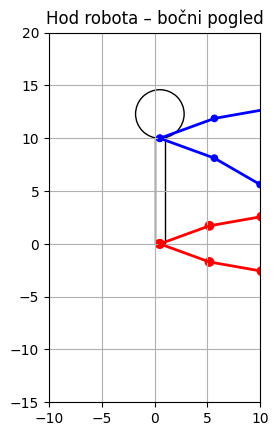

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Dimenzije tijela
trup_width = 1
trup_height = 10
glava_radius = 2.3

# Ruke
nadlaktica_duzina = 5.5
podlaktica_duzina = 5
saka_duzina = 1.5
zglob_radius = 0.3

# Noge
natkoljenica_duzina = 5
potkoljenica_duzina = 5
stopalo_duzina = 2.5
kuk_zglob_radius = 0.4

# Uglovi u stepenima – prirodan hod
uglovi = {
    'desna_ruka_rame': 20,
    'desna_ruka_lakat': 10,
    'lijeva_ruka_rame': -20,
    'lijeva_ruka_lakat': 10,  # Ispravljen ugao

    'desna_noga_kuk': 20,
    'desna_noga_koljeno': -10,
    'lijeva_noga_kuk': -20,
    'lijeva_noga_koljeno': 10,
}

def rotate_point(origin, length, angle_deg):
    angle_rad = np.radians(angle_deg)
    x = origin[0] + length * np.cos(angle_rad)
    y = origin[1] + length * np.sin(angle_rad)
    return (x, y)

def crtanje_limb(ax, start, angle1, length1, angle2, length2, duzina_kraja, boja, zglob_color):
    joint1 = rotate_point(start, length1, angle1)
    joint2 = rotate_point(joint1, length2, angle1 + angle2)
    end = rotate_point(joint2, duzina_kraja, angle1 + angle2)

    ax.plot([start[0], joint1[0]], [start[1], joint1[1]], boja, linewidth=2)
    ax.plot([joint1[0], joint2[0]], [joint1[1], joint2[1]], boja, linewidth=2)
    ax.plot([joint2[0], end[0]], [joint2[1], end[1]], boja + '--', linewidth=2)

    for point in [start, joint1, joint2]:
        ax.add_patch(patches.Circle(point, zglob_radius if boja == 'b' else kuk_zglob_radius, color=zglob_color))

# Priprema figure
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-15, 20)
plt.title("Hod robota – bočni pogled")

# Trup
trup_bottom = (0, 0)
trup_top = (0, trup_height)
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava_center = (trup_width / 2, trup_height + glava_radius)
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruke (plava boja)
rame_desno = (trup_width / 2, trup_height)
rame_lijevo = (trup_width / 2, trup_height)

crtanje_limb(ax, rame_desno,
             -uglovi['desna_ruka_rame'],
             nadlaktica_duzina,
             -uglovi['desna_ruka_lakat'],
             podlaktica_duzina,
             saka_duzina,
             'b', 'blue')

crtanje_limb(ax, rame_lijevo,
             -uglovi['lijeva_ruka_rame'],
             nadlaktica_duzina,
             -uglovi['lijeva_ruka_lakat'],
             podlaktica_duzina,
             saka_duzina,
             'b', 'blue')

# Noge (crvena boja)
kuk_desno = (trup_width / 2, 0)
kuk_lijevo = (trup_width / 2, 0)

crtanje_limb(ax, kuk_desno,
             -uglovi['desna_noga_kuk'],
             natkoljenica_duzina,
             -uglovi['desna_noga_koljeno'],
             potkoljenica_duzina,
             stopalo_duzina,
             'r', 'red')

crtanje_limb(ax, kuk_lijevo,
             -uglovi['lijeva_noga_kuk'],
             natkoljenica_duzina,
             -uglovi['lijeva_noga_koljeno'],
             potkoljenica_duzina,
             stopalo_duzina,
             'r', 'red')

plt.grid(True)
plt.show()

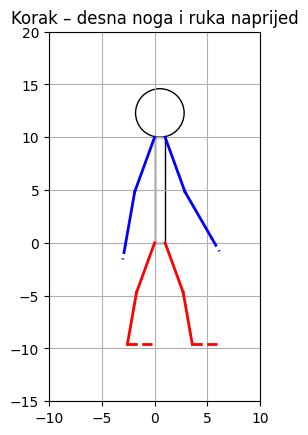

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Funkcija za rotaciju segmenta
def next_point(origin, length, angle_deg):
    angle_rad = np.radians(angle_deg)
    x = origin[0] + length * np.sin(angle_rad)
    y = origin[1] - length * np.cos(angle_rad)
    return (x, y)

# Parametri
trup_width = 1
trup_height = 10
glava_radius = 2.3

nadlaktica = 5.5
podlaktica = 5
saka = 1.5
natkoljenica = 5
potkoljenica = 5
stopalo = 2.5

# Uglovi u stepenima
uglovi = {
    'desna_ruka_rame': 20,
    'desna_ruka_lakat': 10,
    'lijeva_ruka_rame': -20,
    'lijeva_ruka_lakat': -10,
    'desna_noga_kuk': 20,
    'desna_noga_koljeno': -10,
    'lijeva_noga_kuk': -20,
    'lijeva_noga_koljeno': 10,
}

# Početne tačke
trup_bottom = (0, 0)
trup_top = (0, trup_height)
glava_center = (trup_width / 2, trup_height + glava_radius)

# Rame i kuk – referentne tačke
rame_d = (trup_width, trup_height)
rame_l = (0, trup_height)
kuk_d = (trup_width, 0)
kuk_l = (0, 0)

# Desna ruka
lakat_d = next_point(rame_d, nadlaktica, uglovi['desna_ruka_rame'])
zglob_d = next_point(lakat_d, podlaktica, uglovi['desna_ruka_rame'] + uglovi['desna_ruka_lakat'])
saka_d = next_point(zglob_d, saka, uglovi['desna_ruka_rame'] + uglovi['desna_ruka_lakat'])

# Lijeva ruka (ispravka: podlaktica i šaka savijaju se suprotno od lakta)
lakat_l = next_point(rame_l, nadlaktica, uglovi['lijeva_ruka_rame'])
zglob_l = next_point(lakat_l, podlaktica, uglovi['lijeva_ruka_rame'] - uglovi['lijeva_ruka_lakat'])  # OVDJE ISPRAVKA
saka_l = next_point(zglob_l, saka, uglovi['lijeva_ruka_rame'] - uglovi['lijeva_ruka_lakat'])        # OVDJE ISPRAVKA

# Desna noga
koljeno_d = next_point(kuk_d, natkoljenica, uglovi['desna_noga_kuk'])
glezanj_d = next_point(koljeno_d, potkoljenica, uglovi['desna_noga_kuk'] + uglovi['desna_noga_koljeno'])
stopalo_d = (glezanj_d[0] + stopalo, glezanj_d[1])

# Lijeva noga
koljeno_l = next_point(kuk_l, natkoljenica, uglovi['lijeva_noga_kuk'])
glezanj_l = next_point(koljeno_l, potkoljenica, uglovi['lijeva_noga_kuk'] + uglovi['lijeva_noga_koljeno'])
stopalo_l = (glezanj_l[0] + stopalo, glezanj_l[1])

# Crtanje
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-15, 20)

# Trup
trup = patches.Rectangle(trup_bottom, trup_width, trup_height, fill=False)
ax.add_patch(trup)

# Glava
glava = patches.Circle(glava_center, glava_radius, fill=False)
ax.add_patch(glava)

# Ruke
ax.plot([rame_d[0], lakat_d[0]], [rame_d[1], lakat_d[1]], 'b-', linewidth=2)
ax.plot([lakat_d[0], zglob_d[0]], [lakat_d[1], zglob_d[1]], 'b-', linewidth=2)
ax.plot([zglob_d[0], saka_d[0]], [zglob_d[1], saka_d[1]], 'b--', linewidth=2)

ax.plot([rame_l[0], lakat_l[0]], [rame_l[1], lakat_l[1]], 'b-', linewidth=2)
ax.plot([lakat_l[0], zglob_l[0]], [lakat_l[1], zglob_l[1]], 'b-', linewidth=2)
ax.plot([zglob_l[0], saka_l[0]], [zglob_l[1], saka_l[1]], 'b--', linewidth=2)

# Noge
ax.plot([kuk_d[0], koljeno_d[0]], [kuk_d[1], koljeno_d[1]], 'r-', linewidth=2)
ax.plot([koljeno_d[0], glezanj_d[0]], [koljeno_d[1], glezanj_d[1]], 'r-', linewidth=2)
ax.plot([glezanj_d[0], stopalo_d[0]], [glezanj_d[1], stopalo_d[1]], 'r--', linewidth=2)

ax.plot([kuk_l[0], koljeno_l[0]], [kuk_l[1], koljeno_l[1]], 'r-', linewidth=2)
ax.plot([koljeno_l[0], glezanj_l[0]], [koljeno_l[1], glezanj_l[1]], 'r-', linewidth=2)
ax.plot([glezanj_l[0], stopalo_l[0]], [glezanj_l[1], stopalo_l[1]], 'r--', linewidth=2)

# Prikaz
plt.title("Korak – desna noga i ruka naprijed")
plt.grid(True)
plt.show()